행동예측


# 행동 예측

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
X_test_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/human_activity_X_test.txt'
X_train_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/human_activity_X_train.txt'
features_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/human_activity_features.txt'
y_test_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/human_activity_y_test.txt'
y_train_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/human_activity_y_train.txt'

In [ ]:
# "\s+" 한개 이상의 공백으로 나뉘어져있음
# 첫번째줄(칸이름)이 없는경우 header = None
feature_df = pd.read_csv(
                            features_path, 
                            sep="\s+",
                            header = None,
                            names = ["column_index", "column_name"]
                            )

X_train = pd.read_csv(
                        X_train_path,
                        sep = "\s+",
                        header=None,         
                      )
X_test = pd.read_csv(
                      X_test_path,
                      sep = "\s+",
                     header = None
                          )

y_train = pd.read_csv(y_train_path,
                      sep = "\s+",
                      header = None,
                      names = ["action"]
                      )

y_test = pd.read_csv(y_test_path,
                      sep = "\s+",
                      header = None,
                      names = ["action"]
                      )

In [ ]:
# feature_df의 모든 행의 1번쨰 열에 특징의 이름이 들어가있음
# 특징의 이름들만 list형태로 뽑아내기
feature_name = feature_df.iloc[:,1].values.tolist()

# X_train과 x_test의 컬럼 이름을 위에서 추출한 feature_name로 설정
X_train.columns = feature_name
X_test.columns = feature_name

In [ ]:
y_train.head(20)

In [ ]:
# null 값 확인해보기 예시

df = pd.DataFrame({
      "A" : [100, 200, np.nan, 1000, np.nan],
      "B" : [1, 10, 7, 11, 5]
})

# isnull -> nan값이 True 리턴 , True 값은 1 
df.isnull().sum()

A    2
B    0
dtype: int64

In [ ]:
# 빈 분류기 생성
rf_clf = RandomForestClassifier()

# 빈 분류기 훈련
rf_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


array([5, 5, 5, ..., 2, 1, 1])

In [ ]:
# 분류기로 예측 해보기
pred = rf_clf.predict(X_test)

# 예측값 출력
print(pred)
print("=" *30)

# 실제정답 출력
print(y_test)
print("=" *30)

# 정확도 측정
# 진짜값이랑 예측값이 얼마나 일치하는가
accuracy_score(y_test, pred)

[5 5 5 ... 2 1 1]
      action
0          5
1          5
2          5
3          5
4          5
...      ...
2942       2
2943       2
2944       2
2945       2
2946       2

[2947 rows x 1 columns]


0.9202578893790295

In [ ]:
X_test.iloc[100 : 101, :]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
100,0.240421,0.001085,-0.118881,-0.433321,-0.097815,-0.397341,-0.475121,-0.14434,-0.37872,-0.182617,-0.192826,-0.378733,0.428333,0.054422,0.523445,-0.289912,-0.837831,-0.841609,-0.833577,-0.581059,-0.404353,-0.399127,0.354916,0.44396,0.153165,-0.485079,0.63665,-0.678236,0.405237,-0.49318,0.684609,-0.571856,0.405318,-0.320013,0.344977,-0.246277,0.069809,-0.268118,-0.05564,0.335061,...,-0.617422,-0.202847,0.506642,-0.904762,0.280446,-0.158878,-0.547376,-0.581439,-0.643775,-0.570041,-0.72685,-0.859564,-0.581439,-0.90833,-0.535741,0.473958,-0.384615,0.149788,-0.587198,-0.862598,-0.67409,-0.713473,-0.706184,-0.712657,-0.774326,-0.67409,-0.948348,-0.739886,0.210631,-0.904762,0.165407,-0.104555,-0.469177,0.617096,0.134464,-0.80297,0.479051,-0.670877,0.325196,0.005666


In [ ]:
# np.random.randn : 표준 정규 분포 확률에서 실수표본
# 표준 정규 분포 확률에서 실수표본 - >  평균 0 표준편차 1 확률에서 실수들
# np.random.randn(561)  : 표준 정규 분포를 갖는 임의의 실수 561개
new_sensor_data = np.random.randn(561)

# new_sensor_data 데이터를 넣을 임의의 데이터프레임 생성
df_new_sensor = pd.DataFrame(columns = feature_name)

# 위에서 만든 데이터프레임에 561개의 난수를  값으로 넣음
df_new_sensor.loc[0] = new_sensor_data.tolist()

df_new_sensor



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.116941,-0.817188,-2.046999,0.403184,0.921514,0.510211,-0.893916,-2.508147,0.64402,0.16031,-0.489321,0.989705,-0.575766,-0.047929,-0.119907,0.847876,2.024815,-0.714968,1.413907,0.503611,1.00029,-1.010558,-0.762401,0.130333,-0.363397,-0.129569,-0.975518,-1.280611,-2.4486,-0.07838,0.912045,-0.617529,0.252522,-0.55877,0.465942,0.206939,-0.512333,-0.648747,-1.11488,2.006826,...,-2.285865,0.239463,0.727028,0.708288,-0.628778,1.591842,-0.500574,-0.361025,0.678803,1.420726,-0.45607,-0.792186,0.739408,0.862488,-1.268638,1.448829,0.36408,1.236466,-0.093297,0.565824,0.816439,0.699789,0.226622,-0.258623,0.177851,1.738795,1.389495,-0.799418,-1.007377,0.178699,-0.183041,-0.409012,-0.023214,0.666777,0.629468,-1.220013,1.070995,-0.795792,-0.331116,-0.875802


In [ ]:
rf_clf.predict(df_new_sensor)

array([2])

In [ ]:
params = {
    "n_estimators":[100], # 트리 개수 100개
    "max_depth":[6, 8, 10, 12], # 최대 트리의 깊이 6, 8,10 ,12
     "min_samples_leaf":[8, 12, 18], # 최소 트리잎의 개수
    "min_samples_split":[8,16, 20] # 전체 데이터 로우 중에서 
                                  # 최소 몇개의 데이터를 이용해서 트리를 만들거냐
}

rf_clf = RandomForestClassifier(n_jobs=10)
grid_cv = GridSearchCV(rf_clf,param_grid=params, n_jobs=10)

In [ ]:
warnings.filterwarnings('ignore')
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=10,
                                              oob_score=False,
                                              rand

In [ ]:
# 정확도
grid_cv.best_score_
print(grid_cv.best_score_)

# 최적의 파라미터
grid_cv.best_params_
print(grid_cv.best_params_)

0.9265558623177347
{'max_depth': 10, 'min_samples_leaf': 18, 'min_samples_split': 20, 'n_estimators': 100}


In [ ]:
# 최적의 분류기 
# 최적의 파라미터로 설정해서 객체 생성
best_random_forest = grid_cv.best_estimator_

# 예측값을 best_predict 변수에 저장
best_predict = best_random_forest.predict(X_test)

# 정확도
accuracy_score(y_test, best_predict)
print(accuracy_score(y_test, best_predict))

0.9189005768578216


In [ ]:
# 각 컬럼의 중요도 확인하기 .feature_importances
ftr_importances_values = best_random_forest.feature_importances_

# 각 컬럼의 이름과 같이 확인하기위해 Series 형태로 만들기
ftr_importances = pd.Series(ftr_importances_values ,index = feature_name)
print(ftr_importances)
print("=" * 50)

# 제일 중요한거 보려고 내림차순
ftr_importances = ftr_importances.sort_values(ascending = False)

# 상위 20개 
ftr_top20 = ftr_importances.head(20)
print(ftr_importances.head(20))

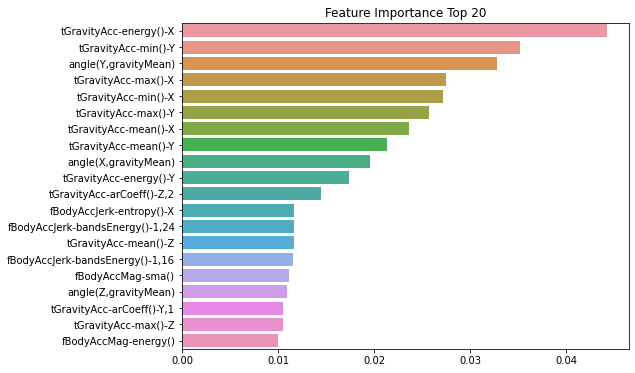

In [ ]:
# 상위 20개 차트로 보기
plt.figure(figsize = (8,6))
plt.title("Feature Importance Top 20")

sns.barplot(
    x = ftr_top20,
    y = ftr_top20.index
            
            )

# 실습

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
X_test_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/human_activity_X_test.txt'
X_train_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/human_activity_X_train.txt'
features_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/human_activity_features.txt'
y_test_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/human_activity_y_test.txt'
y_train_path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/11주차 머신러닝/datasets/human_activity_y_train.txt'

In [ ]:
# "\s+" 한개 이상의 공백으로 나뉘어져있음
# 첫번째줄(칸이름)이 없는경우 header = None
feature_name_df = pd.read_csv(
    features_path,
    sep="\s+",
    header = None,
    names = ["column_index", "column_name"]                     
 )

X_train = pd.read_csv(
    X_train_path,
    sep = "\s+",
    header=None,    
)

X_test = pd.read_csv(
    X_test_path,
    sep = "\s+",
    header = None                    
 )

y_train = pd.read_csv(
    y_train_path,
    sep = "\s+",
    header = None,
    names = ["action"]
                      )

y_test = pd.read_csv(
    y_test_path,
    sep = "\s+",
    header = None,
    names = ["action"]
    )

In [ ]:
feature_name =  feature_name_df.iloc[:, 1].values.tolist()

X_train.columns = feature_name
X_test.columns =  feature_name

X_train.describe()

In [ ]:
# 1 걷기
# 2 계단 오르기
# 3 계단 내려가기
# 4 앉기
# 5 서있기
# 6 눕기

print(y_train['action'].value_counts())

# null값 합 조회
X_train.isnull().sum()

In [ ]:
# 분류기 객체생성
rf_clf = RandomForestClassifier()

# 분류기 학습
rf_clf.fit(X_train,y_train)

In [ ]:
# 예측
pred = rf_clf.predict(X_test)

# 정확도
accuracy = accuracy_score(y_test, pred)
print("랜덤 포레스트 정확도 : {}".format(accuracy))

랜덤 포레스트 정확도 : 0.9300984051577876


Random Forest 성능 향상

In [ ]:
params = {
    "n_estimators":[100], # 트리 개수 100개
    "max_depth":[6, 8, 10, 12], # 최대 트리의 깊이 6, 8,10 ,12
     "min_samples_leaf":[8, 12, 18], # 최소 트리잎의 개수
    "min_samples_split":[8,16, 20] # 전체 데이터 로우 중에서 
                                   # 최소 몇개의 데이터를 이용해서 트리를 만들거냐
}

In [ ]:
rf_clf = RandomForestClassifier(n_jobs=10)
grid_cv = GridSearchCV(rf_clf,param_grid=params, n_jobs=10)

# X_train, y_train으로 모든 경우 수(설정한 파라미터)를 테스트해서 정확도가 높은 파라미터 찾기
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터\n' ,grid_cv.best_params_)
print('최고 예측 정화도 : {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# 최적의 분류기 
# 최적의 파라미터로 설정해서 객체 생성
best_random_forest = grid_cv.best_estimator_

# 예측값을 best_predict 변수에 저장
best_predict = best_random_forest.predict(X_test)

# 정확도
accuracy_score(y_test, best_predict)
print(accuracy_score(y_test, best_predict))

0.9189005768578216


In [ ]:
# 각 컬럼의 중요도 확인하기 .feature_importances
ftr_importances_values = best_random_forest.feature_importances_

# 각 컬럼의 이름과 같이 확인하기위해 Series 형태로 만들기
ftr_importances = pd.Series(ftr_importances_values ,index = feature_name)
print(ftr_importances)
print("=" * 50)

# 제일 중요한거 보려고 내림차순
ftr_importances = ftr_importances.sort_values(ascending = False)

# 상위 20개 
ftr_top20 = ftr_importances.head(20)
print(ftr_importances.head(20))

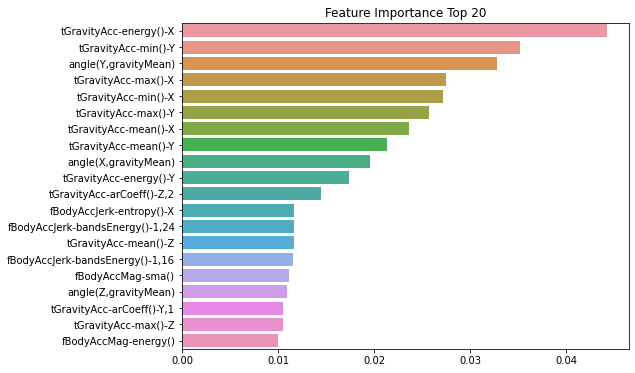

In [ ]:
# 상위 20개 차트로 보기
plt.figure(figsize = (8,6))
plt.title("Feature Importance Top 20")

sns.barplot(
    x = ftr_top20,
    y = ftr_top20.index
            
            )

## s

In [ ]:
params = {
    "n_estimators":[100], # 트리 개수 100개
    "max_depth":[6, 8, 10, 12], # 최대 트리의 깊이 6, 8,10 ,12
     "min_samples_leaf":[8, 12, 18], # 최소 트리잎의 개수
    "min_samples_split":[8,16, 20] # 전체 데이터 로우 중에서 
                                  # 최소 몇개의 데이터를 이용해서 트리를 만들거냐
}

# 1번  -> 빈 분류기를 일단 하나 만들
rf_clf = RandomForestClassifier(n_jobs=10)
grid_cv = GridSearchCV(rf_clf,param_grid=params, n_jobs=10)

# 2번 -> GridSearchCv라는 함수로 이제 최적의 파라미터를 찾을 것임!
# 파라미터란??  어떠한  옵션에 대한 수치! 라고 생각하면 됌

# 그렇다면 최적의 파라미터를 왜 찾나??
# 우리가 빈 분류기에 학습시킬 X_train ,Y_train 양이 너무 많기 떄문

# 간단히 말하면 분류기 성능을 높이기 위해서
# 분류기에 X_train, Y_train 값을 주고 학습할때 '요렇게도 해보고 저렇게도 해보기 위해서'
# 요렇게도 해보고 저렇게도 해보는 것을 편리하게 하기위해 GridSerachCv를 사용!

# 따라서 아래 코드를 해석하자면
grid_cv = GridSearchCV(rf_clf,param_grid=params, n_jobs=10)

# 우리가 만들어논 빈 분류기  "rf_clf"에 학습을 할껀데  좋은 성능의 분류기를 찾기위해

# 학습할때
# param_grid = params    
# 위에 저렇게 우리가 설정한 수치들(파라미터)을 가지고 요렇게도 해보고 저렇게도 해본다.

#  n_jobs=10 :  양이 많으니 cpu 10개를 사용해서 놔눠서 돌려본다